# 04_perceptron

# Q1：Logistic Sigomid について調べ説明せよ。

# A1. 

シグモイド関数は以下の式で表される。  
<img src="images/sigmid.png" height="30%" width="30%" align="left">

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math


x = np.arange(-10, 10, 0.1)  # -10 ~ 10まで0.1刻み
e = math.e  # 自然対数 
y = 1 / (1 + e**-x)  # シグモイド関数

plt.plot(x, y)
plt.show()

<Figure size 640x480 with 1 Axes>

- 標準シグモイド関数は a=1 を代入して表す。  
- シグモイド関数式の eは自然対数である。
- シグモイド関数の性質は、0から1の単調増加関数で1つの変曲点を持つ。  
- 単調増加関数とは、値の変化が一定に増加する連続関数である。  
- 変曲点とは、曲線の曲がる方向が変わる点である。  

引用：https://ja.wikipedia.org/wiki/%E3%82%B7%E3%82%B0%E3%83%A2%E3%82%A4%E3%83%89%E9%96%A2%E6%95%B0

# Q2：Logistic Sigmoid をアクティベーション関数として持つ<br><br>パーセプトロンのモデルについて調べ説明せよ。

# A2.

**パーセプトロンとは：**  
- パーセプトロンとは、視覚や脳の機能をモデル化したものでありパターン認識を行うシンプルなネットワーク。
- ネットワーク構成としては、(感覚層)入力層 → (連合層)中間層 → (反応層)出力層の3つからなる。  
- パターン認識とは、画像・音声などの雑多な情報を含むデータの中から、一定の規則や意味を持つ対象を選別して取り出す処理。  

**アクティベーション(活性化)関数とは：**  
- 伝達関数という意味でも捉えることができるが、入力層から与えられるデータが線形変換した後に、適用される関数
- パーセプトロンでの中間層にあたる。  



引用：  
https://ja.wikipedia.org/wiki/%E3%83%91%E3%83%BC%E3%82%BB%E3%83%97%E3%83%88%E3%83%AD%E3%83%B3  
https://ja.wikipedia.org/wiki/%E3%83%91%E3%82%BF%E3%83%BC%E3%83%B3%E8%AA%8D%E8%AD%98  

<img src="images/sigmoid_1.png" height="50%" width="50%" align="left">

# Q3：0 を false, 1 を true としたとき、論理否定を行う関数を、<br>Logistic Sigmoid をアクティベーション関数として<br>持つパーセプトロンを用いて作成せよ。<br><br>パーセプトロンのパラメータの調整には平均二乗誤差と最急降下法を用いること。<br><br>また、調整済みのパラメータを保存し、作成した関数を他のプログラムからいつでも利用できるようにせよ。

# A3. 

<img src="images/method01.png"  height="50%" width="50%" align="left">

入力層(式)  
$
y = \sum_{i}(aXi + b)
$

中間層(シグモイド関数: a=1とする)  
$ 
S = \frac{1}{1-e^ay}  
$

誤差関数(平均二乗誤差)  
平均二乗誤差とは、予測値と真の値の離れ具合の平均を求める。  
引用：http://ebw.eng-book.com/heishin/MeanSquaredError_mean_squared_error_calculation.do?category=mean_squared_error  

- 誤差関数(平均二乗誤差)  

z = 真の値  
$
平均二乗誤差 = \frac{1}{データの総数(n)}\sum_{i}(予測値 - z_i)^2
$  
$  
E(a) = \frac{1}{n}\sum_{i}((\frac{1}{1-e^-(aX_i+b)}) -z_i)^2
$



- 最急降下法  
$
a^(k+1) = a^(k) - α\frac{d \frac{1}{n}\sum_{i}((\frac{1}{1+e^-(aX_i+b)})-z_i)^2}{d  a}
$  
- パラメータaの微分式  
$
a^(k+1) = a^(k) -α\frac{1}{n}\sum_{i}(2(\frac{1}{1+e^-(aX_i+b)})-z_i)(-1)(\frac{1}{1+e^-aX_i-b}))
$
- バイアスbの微分式  
$
b^(k+1) = b^(k) -α\frac{1}{n}\sum_{i}(2(\frac{1}{1+e^-(aX_i+b)})-z_i)(-1)(\frac{1}{1+e^-aX_i-b}))
$

<img src="images/" height="50%" width="50%" align="left">

In [2]:
sum(np.array([1, 0])*0.1+0.5)

1.1

In [44]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


class Neuron:
    
    def __init__(self, a, b, α):
        self._a = a
        self._b = b
        self._α = α
        self._error = None
        self._e = math.e  # 自然対数

    def Input_layer(self, x):
        """入力層"""
        y = self._a*x + self._b  # 線形関数
        return y
    
    def activation_function(self, y):
        """中間層"""
        s = 1 / (1 + self._e**-y)  # シグモイド関数
        return s
        
    def error_function(self, s, z):
        """出力層"""
        self._error = ((s - z)**2)/len(s)  # 平均二乗誤差関数
        return self._error
        
    def parameter_update(self, s, z):
        """パラメータ更新"""
        self._a = self._a - self._α*((sum(s-z))*(self._a*s*(1-s)))  # 重みパラメータ
        
        self._b = self._b - self._α*((sum(s-z))*(self._b*s*(1-s)))  # バイアス
        return self._a, self._b
        

if __name__=='__main__':      
    x = np.array([0, 1])  # 入力値 0 or 1を入れる
    z = np.array([1, 0])  # 真の値データ
    a = np.array([0.5, 0.5])  # 初期値のパラメータ
    b = 0.3 # バイアス
    α = 0.1  # ハイパーパラメータ(調整項)
    adjusted_parameter = {}  # 調整済みパラメータ
    neuron = Neuron(a, b, α)
    error_list = {"0": [], "1": []}
    parameter = {"0": [], "1": []}
    
    for _ in range(100):
        y = neuron.Input_layer(x)  # 入力層
        s = neuron.activation_function(y)  # 中間層
        e = neuron.error_function(s, z)  # 誤差関数
        a, b = neuron.parameter_update(e, y)  # パラメータ更新
        error_list["0"].append(e[0])
        error_list["1"].append(e[1])
        parameter["0"].append(a[0])
        parameter["1"].append(a[1])        

        print("y: ", y)
        print("s: ", s)
        print("e: ", e)

        #print("a", a,)

y:  [0.3 0.8]
s:  [0.57444252 0.68997448]
e:  [0.09054959 0.23803239]
y:  [0.3019058  0.81119315]
s:  [0.57490834 0.6923637 ]
e:  [0.09035146 0.23968375]
y:  [0.30384882 0.82276904]
s:  [0.57538312 0.69482381]
e:  [0.09014975 0.24139007]
y:  [0.30583035 0.83474818]
s:  [0.57586717 0.69735797]
e:  [0.08994433 0.24315407]
y:  [0.30785176 0.84715259]
s:  [0.57636081 0.69996949]
e:  [0.08973508 0.24497865]
y:  [0.30991448 0.86000596]
s:  [0.57686439 0.7026619 ]
e:  [0.08952187 0.24686687]
y:  [0.31202001 0.87333375]
s:  [0.57737825 0.70543891]
e:  [0.08930457 0.24882203]
y:  [0.31416997 0.88716342]
s:  [0.57790278 0.70830445]
e:  [0.08908303 0.2508476 ]
y:  [0.31636603 0.90152459]
s:  [0.57843837 0.71126271]
e:  [0.0888571  0.25294732]
y:  [0.31860999 0.9164493 ]
s:  [0.57898546 0.71431807]
e:  [0.08862662 0.25512515]
y:  [0.32090375 0.93197219]
s:  [0.57954449 0.71747523]
e:  [0.08839142 0.25738535]
y:  [0.32324932 0.94813084]
s:  [0.58011593 0.72073912]
e:  [0.08815132 0.25973244]
y:  [0

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in multiply
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in multiply
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in multiply
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in multiply


In [45]:
# x = np.array([0,1])
# z = np.array([1,0])
# a = np.array([0.5, 0.5])
# b = 0.3
# α = 0.1
# for _ in range(100):
#     y = a*x + b
# #     print("y : ", y)
#     s = 1 / (1 + math.e**-y)
# #     print("s : ", s)
#     a = a - α*((sum(s-z))*(s*(1-s)))
#     b = b - α*((sum(s-z))*(s*(1-s)))
# #     print("update_a: ", a)
#     print("update_b: ", b)

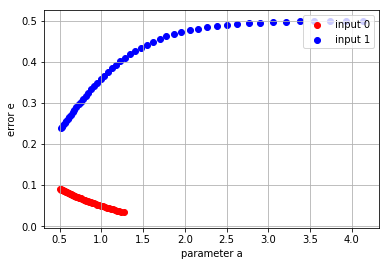

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(parameter["0"], error_list["0"], color="red", label='input 0')
ax.scatter(parameter["1"], error_list["1"], color="blue", label='input 1')
plt.xlabel("parameter a")
plt.ylabel("error e")
ax.grid(True)
ax.legend(loc='upper right')
plt.show()

In [6]:
print("param : ", parameter["0"])
print("error_list : ", error_list["0"])

param :  [0.09054958574879755, 0.0898902315840778, 0.08921218779718011, 0.08851501390087378, 0.08779826580085684, 0.08706149658913212, 0.08630425748973723, 0.08552609898509768, 0.084726572156398, 0.08390523027720881, 0.08306163070615366, 0.08219533713157862, 0.08130592222883853, 0.08039297079863525, 0.0794560834623748, 0.0784948809970449, 0.07750900939668445, 0.07649814574883718, 0.07546200501084148, 0.07440034776051677, 0.07331298897670577, 0.07219980787520294, 0.07106075878320053, 0.06989588297967235, 0.0687053213605488, 0.0674893277083475, 0.06624828226042666, 0.06498270518466571, 0.06369326949429238, 0.06238081287375896, 0.061046347853574726, 0.059691069770530264, 0.05831636198434473, 0.05692379789207988, 0.05551513938336766, 0.054092331505057836, 0.052657493243841835, 0.05121290447987529, 0.049760989304447216, 0.04830429602314271, 0.04684547427757237, 0.04538724981027325, 0.043932397466874544, 0.04248371307597352, 0.04104398486988568, 0.039615965108504354, 0.03820234254455995, 0.0